## TASK 1

In [196]:
import numpy as np

data_file = open('ex1data1.txt', 'r')

populations = []
profits = []

for line in data_file:
    population, profit = line.split(',')
    populations.append(float(population))
    profits.append(float(profit))

data = {
    'populations': np.array(populations, dtype=np.float64),
    'profits': np.array(profits, dtype=np.float64)
}

data_file.close()

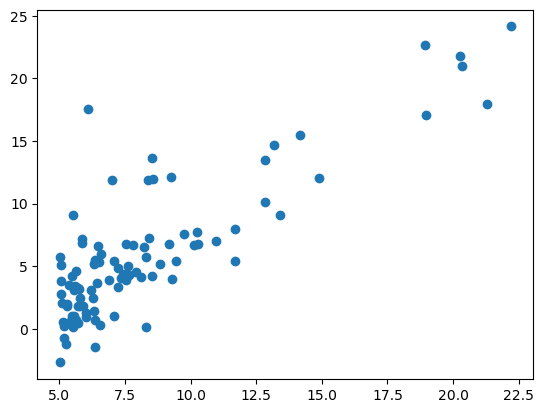

In [197]:
import matplotlib.pyplot as plt

plt.scatter(data['populations'], data['profits'])
plt.show()

In [198]:
def computeCost(X, y, theta):
    m = X.shape[0]
    cost = (X @ theta - y).T @ (X @ theta - y) / (2 * m) 
    return cost

In [199]:
m = data['populations'].shape[0]

X = np.column_stack((np.ones(m), data['populations']))
y = data['profits']
theta = np.array([0, 0])

print(computeCost(X, y, theta))

32.072733877455676


In [200]:
def gradientDescent(X, y, theta, alpha, iters):
    m = X.shape[0]
    new_theta = theta
    costs = []

    for i in range(iters):
        new_theta = new_theta - ((alpha / m) * (X.T @ (X @ new_theta - y)))
        cost = computeCost(X, y, new_theta)
        costs.append(cost)
    
    return new_theta, costs

In [201]:
alpha = 0.01
iters = 1000

result_theta, costs = gradientDescent(X, y, theta, alpha, iters)
result_theta

array([-3.24140214,  1.1272942 ])

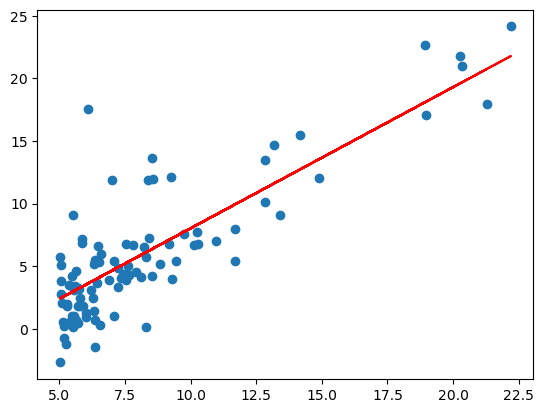

In [202]:
import matplotlib.pyplot as plt

plt.scatter(data['populations'], data['profits'])
plt.plot(data['populations'], X @ result_theta, color='r')
plt.show()

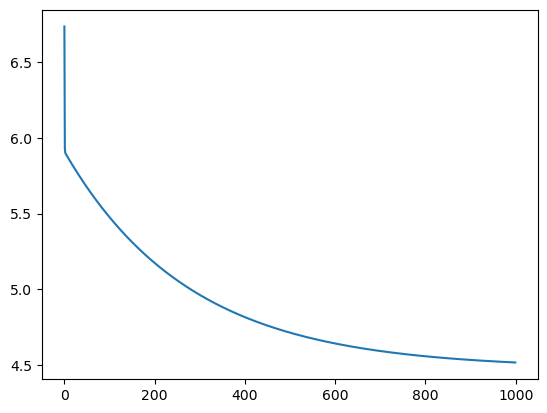

In [203]:
plt.plot(costs)

In [204]:
alpha = 0.0001
iters = 1000

result_theta, costs = gradientDescent(X, y, theta, alpha, iters)
result_theta

array([0.00868908, 0.80057917])

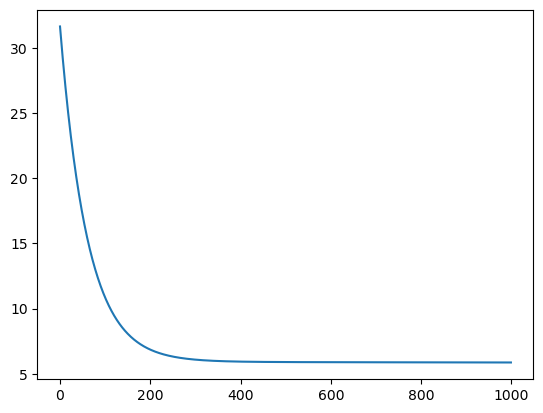

In [205]:
plt.plot(costs)

In [206]:
alpha = 0.008

result_theta, costs = gradientDescent(X, y, theta, alpha, iters)
result_theta

array([-2.95680359,  1.09870319])

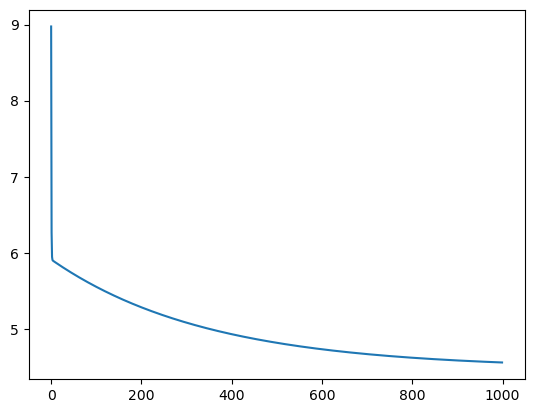

In [207]:
plt.plot(costs)

In [208]:
# profit_cost = computeCost(np.array([1, 10]), y, result_theta)
# profit_cost
x = np.array([[1, 10]])
profit_cost = x @ result_theta
profit_cost

array([8.03022832])

In [209]:
from sklearn import linear_model


model = linear_model.LinearRegression()
model.fit(X, y)
predicts = model.predict(x)
predicts[-1]

8.034555563584078

## Task 2

In [210]:
fileee = open('ex1data2.txt', 'r')

sizes = []
bedrooms = []
prices = []

for line in fileee:
    size, bedroom, price = line.split(',')
    sizes.append(float(size))
    bedrooms.append(float(bedroom))
    prices.append(float(price))
    
fileee.close()

In [211]:
sizes_mean = np.mean(sizes)
sizes_std = np.std(sizes)
normalized_sizes = [(size - sizes_mean) / sizes_std for size in sizes]

bedrooms_mean = np.mean(bedrooms)
bedrooms_std = np.std(bedrooms)
normalized_bedrooms = [(bedroom - bedrooms_mean) / bedrooms_std for bedroom in bedrooms]

prices_mean = np.mean(prices)
prices_std = np.std(prices)
normalized_prices = [(price - prices_mean) / prices_std for price in prices]

ndata = {
    'sizes': np.array(normalized_sizes),
    'bedrooms': np.array(normalized_bedrooms),
    'prices': np.array(normalized_prices),
    # 'prices': np.array(prices),
}


In [212]:
m = ndata['sizes'].shape[0]
X = np.column_stack((np.ones(m), ndata['sizes'], ndata['bedrooms']))
y = ndata['prices']

alpha = 0.05
iters = 1000
theta = np.array([0, 0, 0])

cost = computeCost(X, y, theta)
print('Result of computeCost():', cost)

result_thetas, costs = gradientDescent(X, y, theta, alpha, iters)
print('Result of learning:', costs[-1])

test_size = (3000 - sizes_mean) / sizes_std
test_bedroom = (4 - bedrooms_mean) / bedrooms_std

test_x = np.array([[1, test_size, test_bedroom]])
price_predict = test_x @ result_thetas
print('Normalized Price predict:', price_predict[-1])
print('Price predict:', int(price_predict[-1] * prices_std + prices_mean))

Result of computeCost(): 0.5
Result of learning: 0.1335274909855429
Normalized Price predict: 1.0659861941974063
Price predict: 472277


In [213]:
from sklearn import linear_model


model = linear_model.LinearRegression()
model.fit(X, y)
predicts = model.predict(test_x)
predicts[-1]

1.065986194214657

In [214]:
round(price_predict[0], 5) == round(predicts[-1], 5)

True

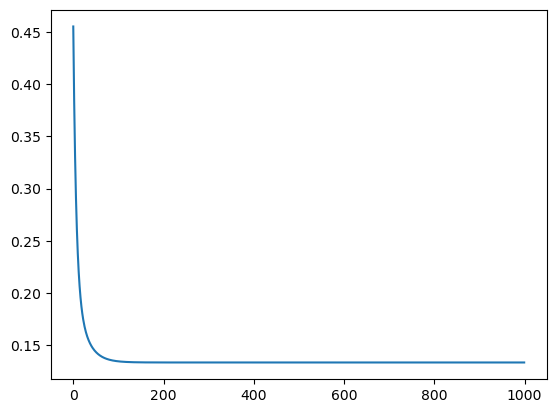

In [215]:
plt.plot(costs)

plt.show()